In [4]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Exploratory Data Analysis

In [5]:
# Load the file into a DataFrame
apple_quality = pd.read_csv("apple_quality.csv")

print(apple_quality.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  


In [6]:
# Get the dimensions of the dataset
dimensions = apple_quality.shape
print("Number of rows:", dimensions[0])
print("Number of columns:", dimensions[1])

Number of rows: 4001
Number of columns: 9


In [7]:
print(apple_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB
None


In [8]:
print(apple_quality.isnull().sum())

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [9]:
apple_quality_cleaned = apple_quality.dropna()

print(apple_quality_cleaned.isnull().sum())

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


In [10]:
# Label encoding: 1 = good, 0 = bad
label_mapping = {"good": 1, "bad": 0}
apple_quality_cleaned = apple_quality_cleaned.copy()
apple_quality_cleaned['Quality'] = apple_quality_cleaned['Quality'].replace(label_mapping)

In [11]:
apple_quality_cleaned.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity  Quality  
0  -0.491590483        1  
1  -0.722809367        1  
2   2.621636473        0  
3   0.790723217        1  
4   0.501984036        1

In [12]:
# Check column data types
column_data_types = apple_quality_cleaned.dtypes
print(column_data_types)

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality          int64
dtype: object


In [13]:
# Change 'Acidity' data type to float64
apple_quality_cleaned['Acidity'] = apple_quality_cleaned['Acidity'].astype('float64')
print(apple_quality_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 312.5 KB
None


In [14]:
apple_quality_cleaned.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity      Quality  
count  4000.000000  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877     0.501000  
std       1.930286     1.874427     2.110270     0.500062  
min      -5.961897    -5.864599    -7.010538     0.000000  
25%      -0.801286    -0.771677    -1.377424     0.000000  
50%       0.534219     0.503445     0.022609     1.000000  
75%       1.835976     1.766212     1.510493     1.000000  
max       7.364403     7.237837     7.404736     1.000000

In [15]:
#The feature A_id adds no value to the model and can be dropped
apple_quality_cleaned.drop("A_id", axis=1, inplace=True)

# Data Visualization

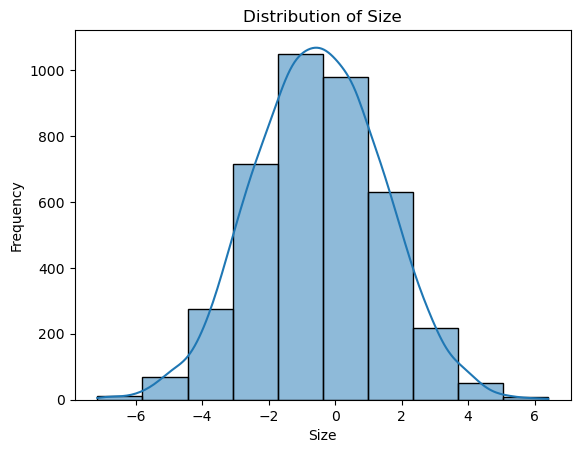

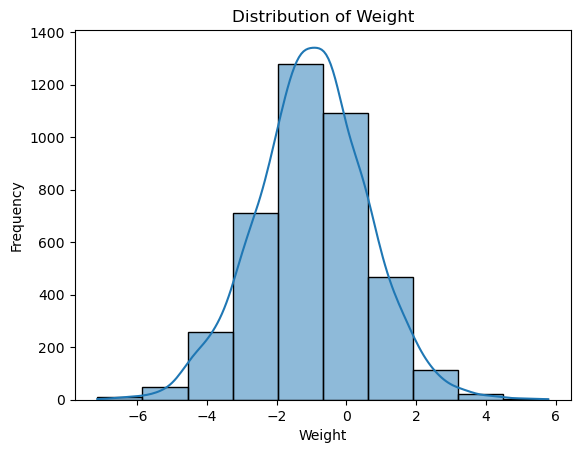

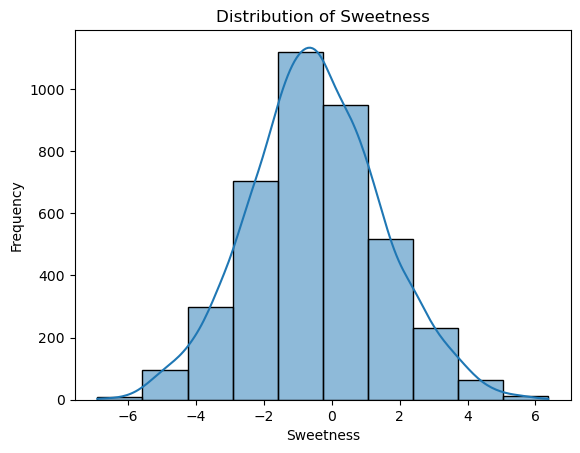

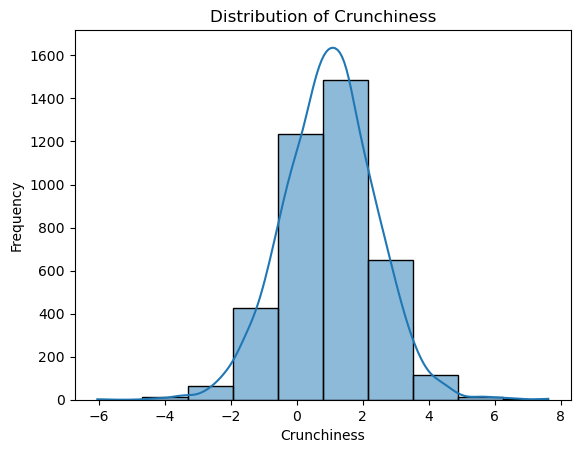

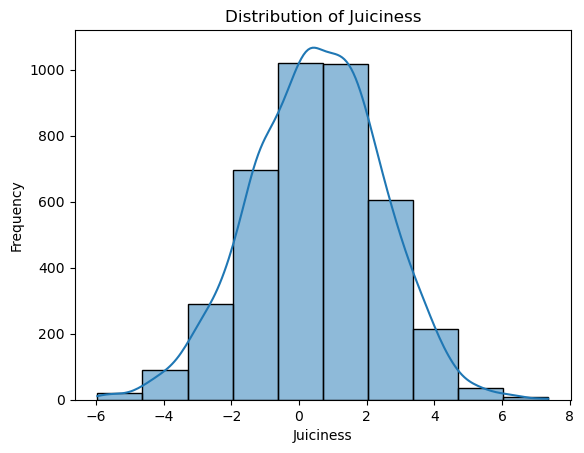

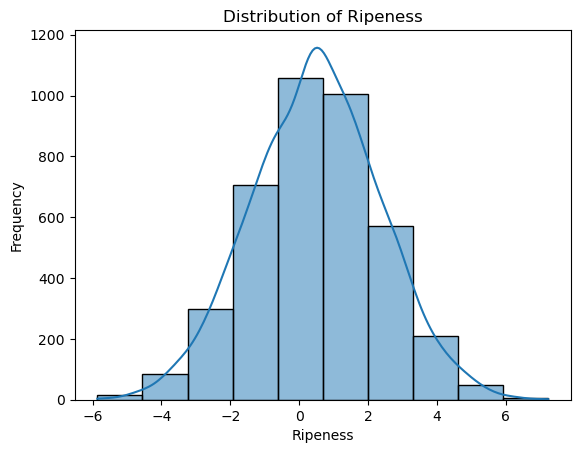

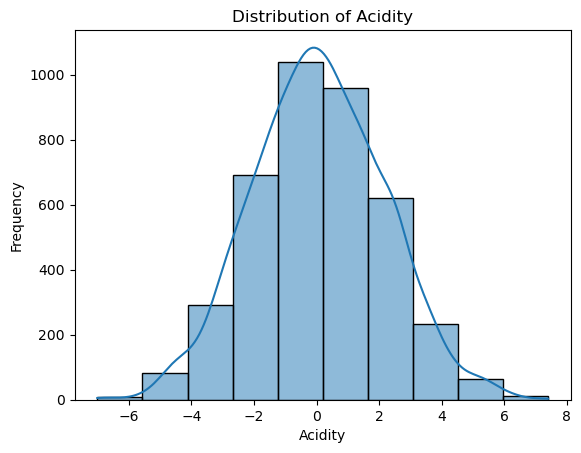

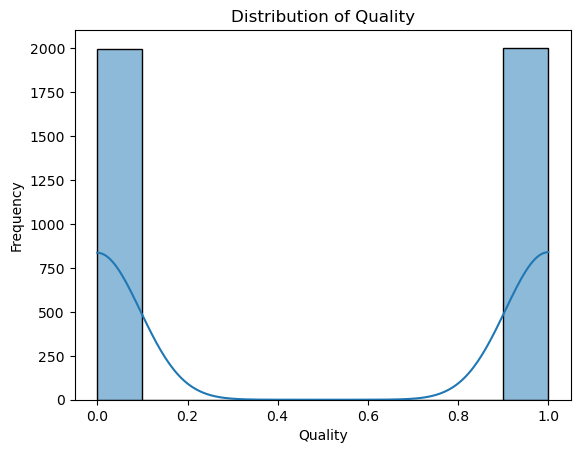

In [16]:
for column in apple_quality_cleaned.columns:
    sns.histplot(apple_quality_cleaned[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

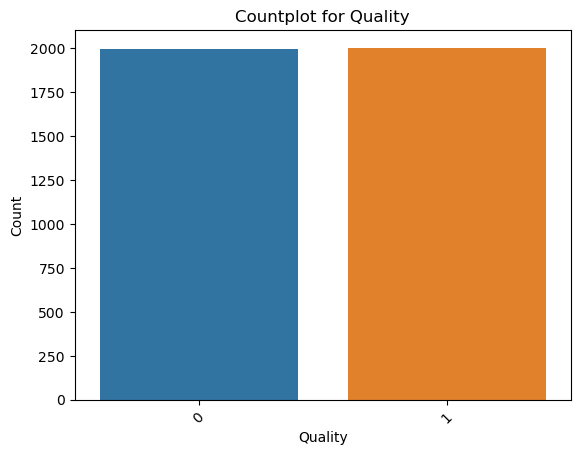

In [17]:
sns.countplot(data=apple_quality_cleaned, x='Quality')
plt.title('Countplot for Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

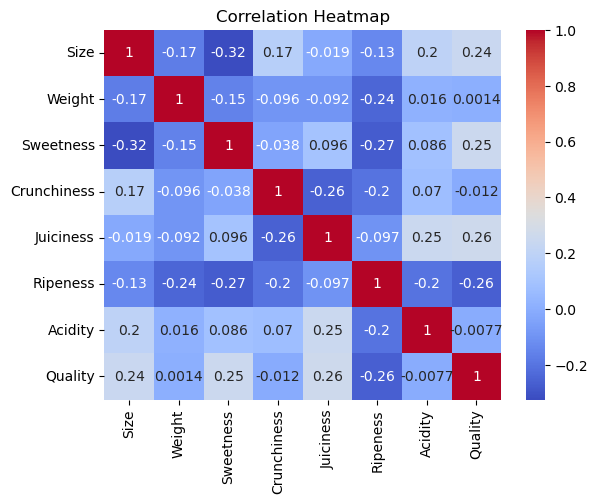

In [18]:
# Correlation Heatmap
corr_matrix = apple_quality_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\kermi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


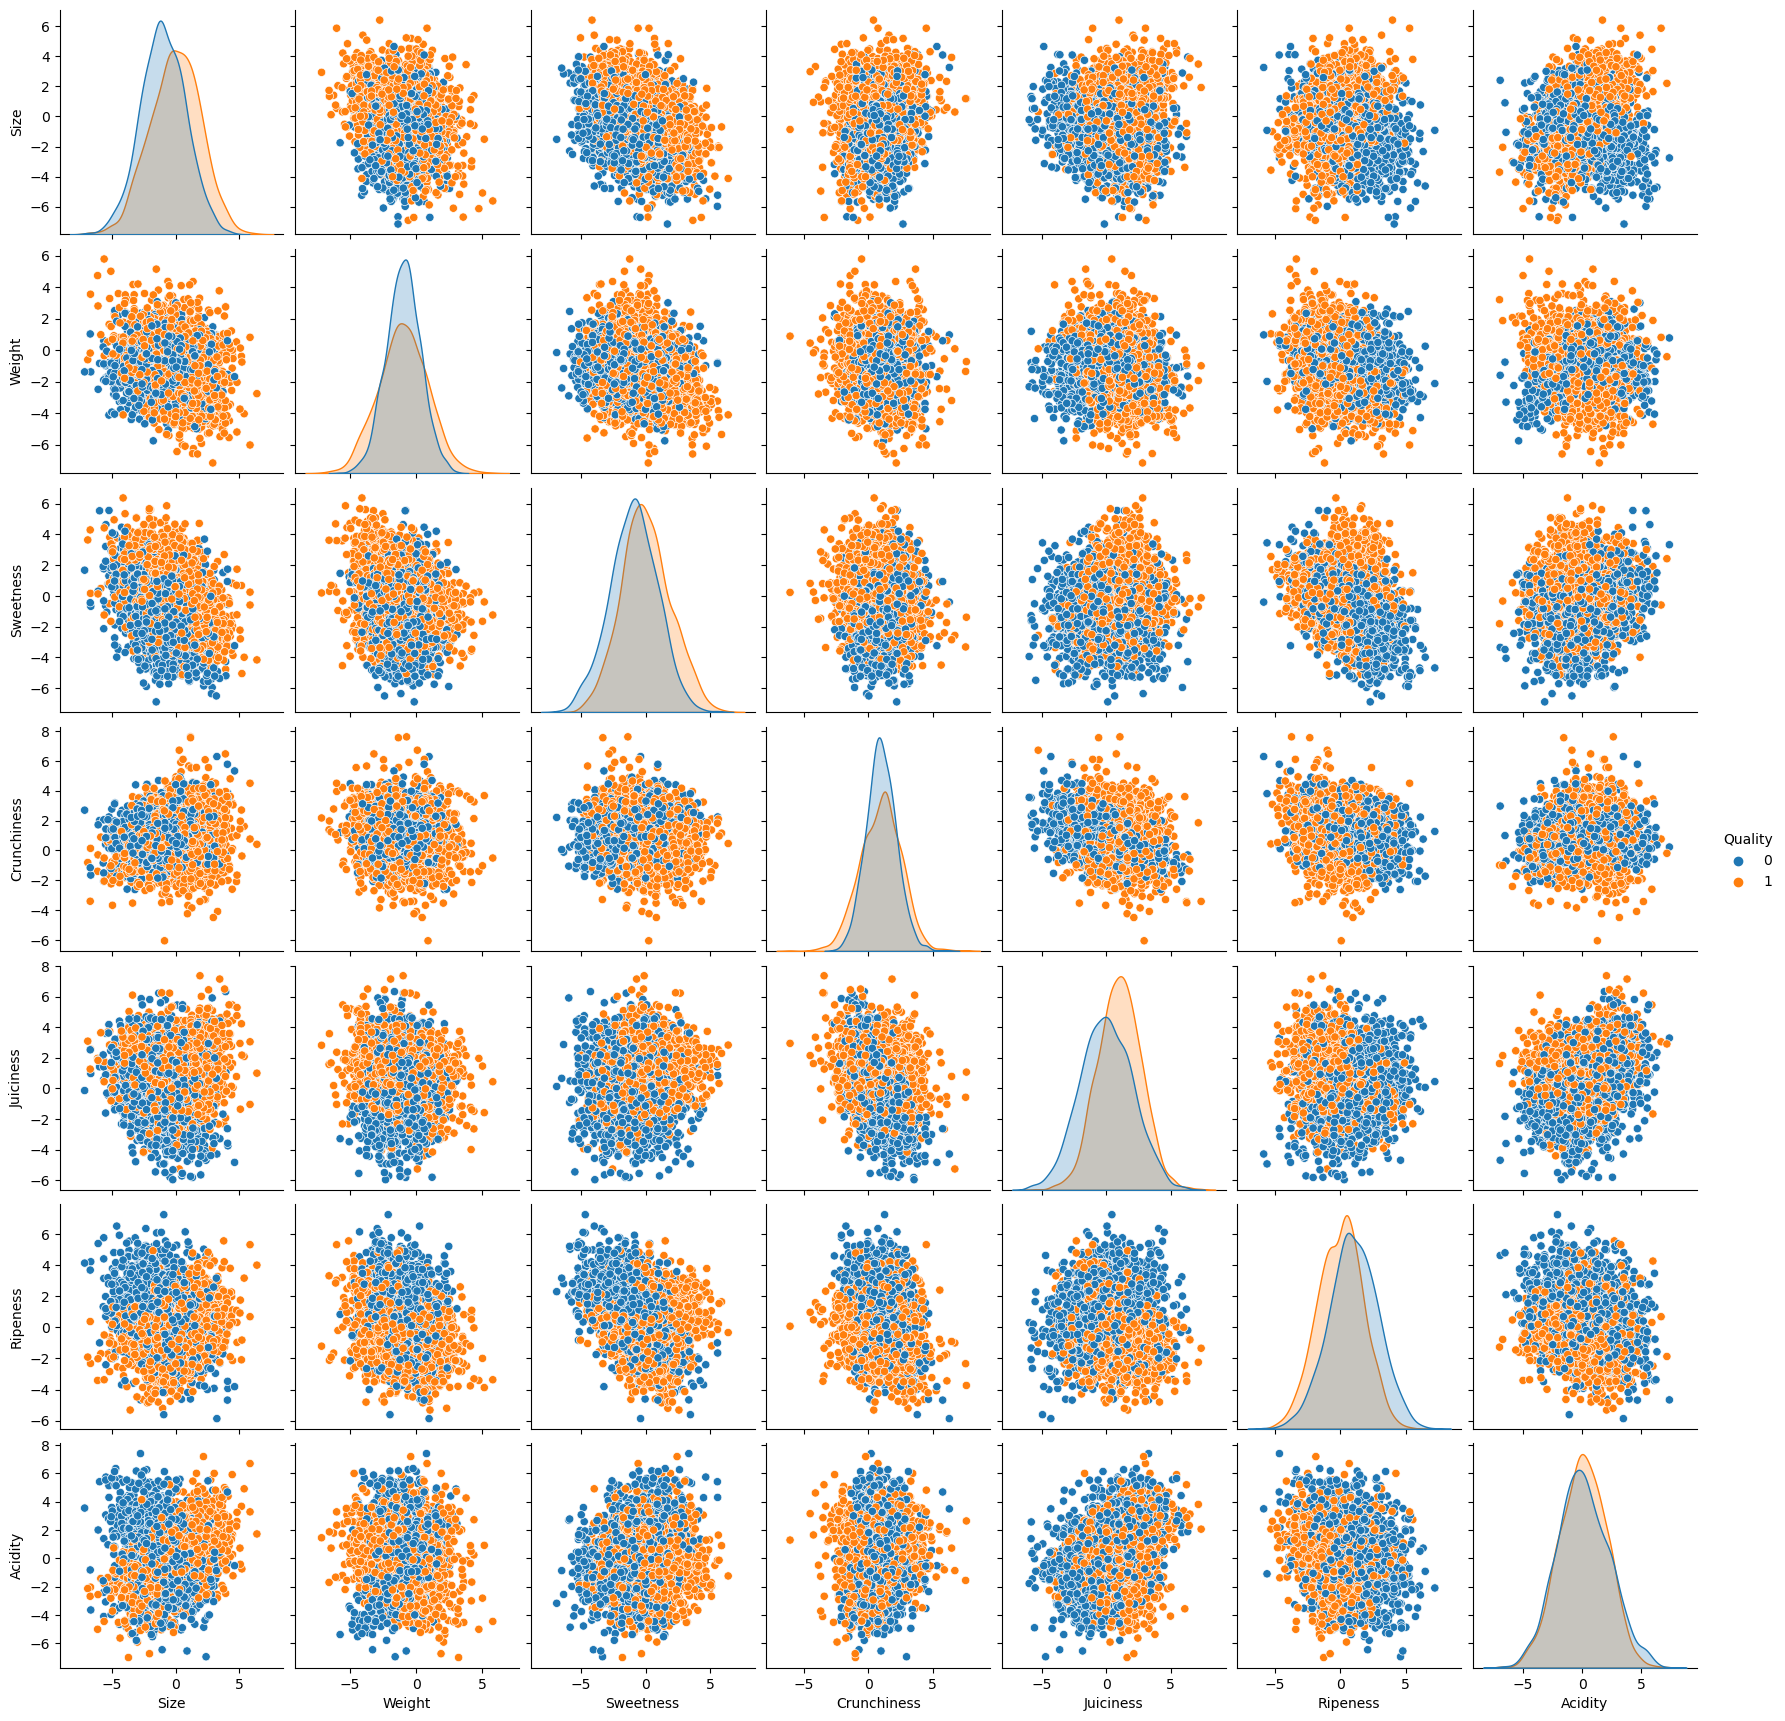

In [19]:
# Pairplot
sns.pairplot(apple_quality_cleaned, hue='Quality')
plt.show()

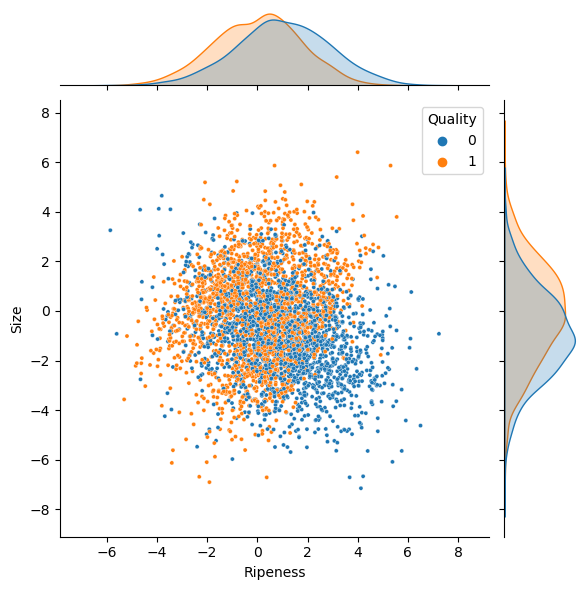

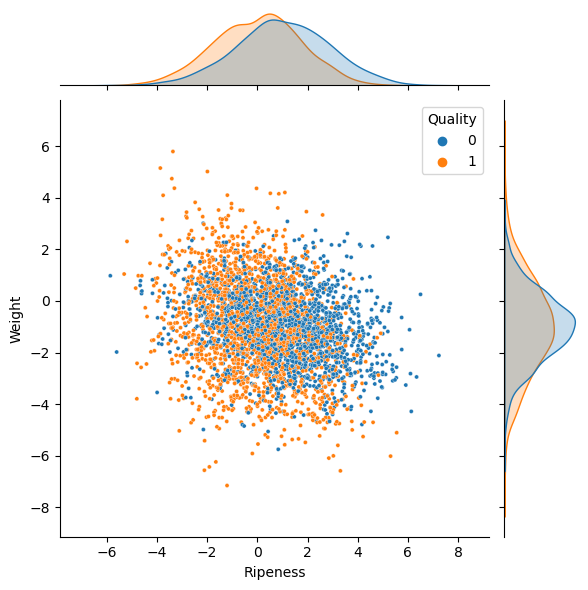

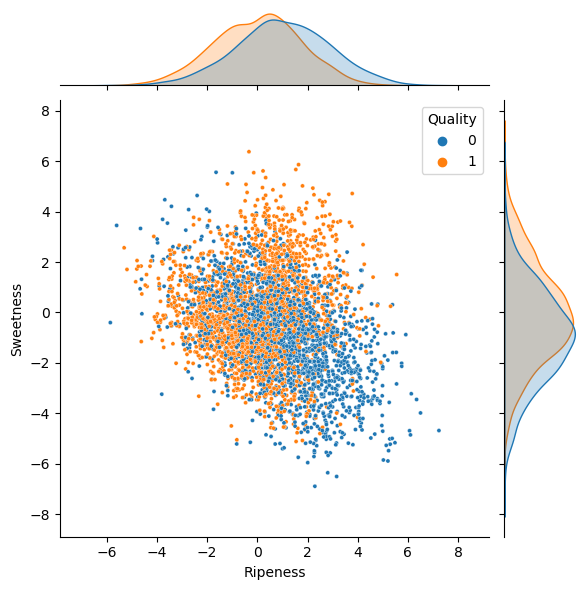

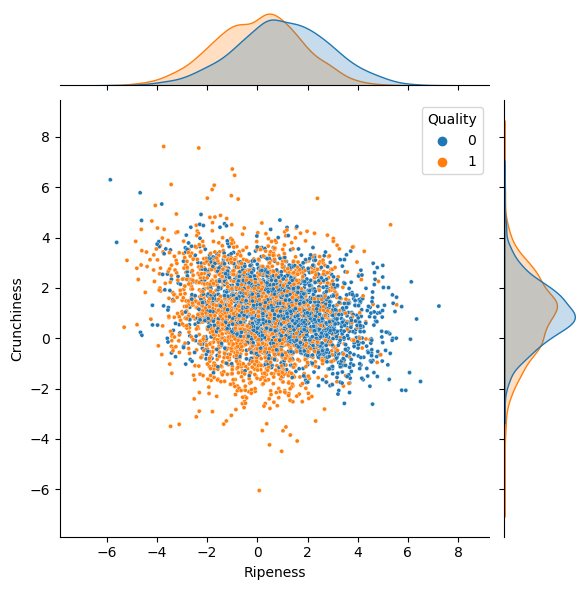

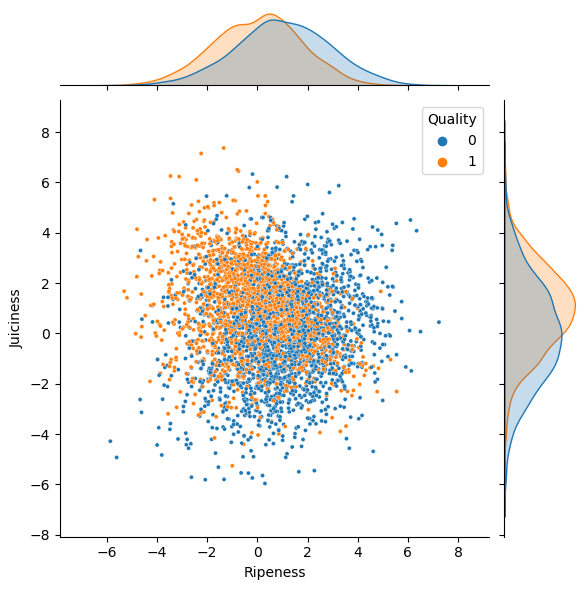

In [20]:
for column in apple_quality_cleaned.columns:
    if column == 'Quality' or column == 'Ripeness':
        break
    sns.jointplot(x='Ripeness', y=column, hue='Quality', data=apple_quality_cleaned, palette='tab10', s=9)
    plt.show()

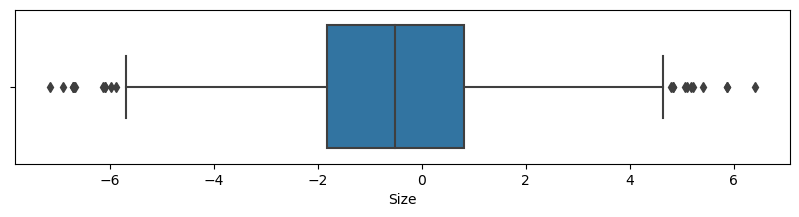

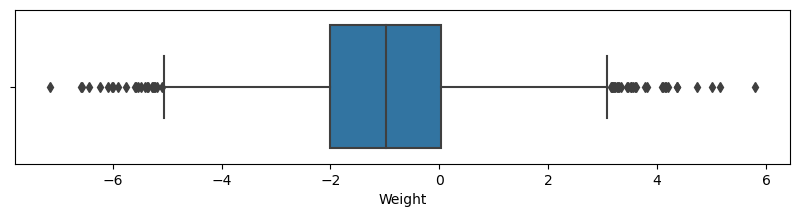

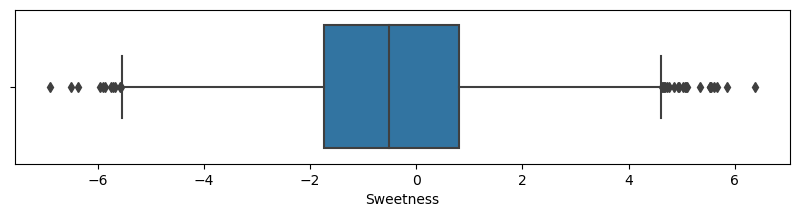

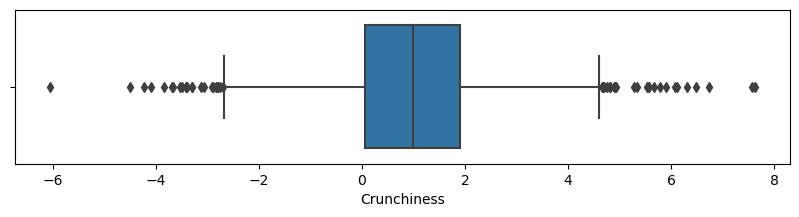

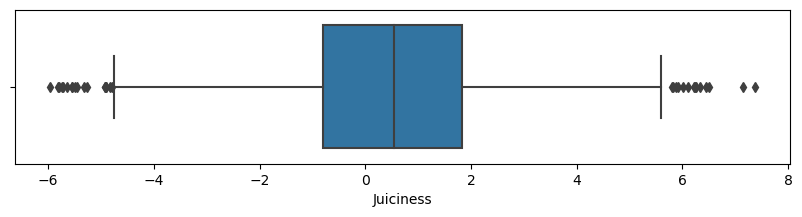

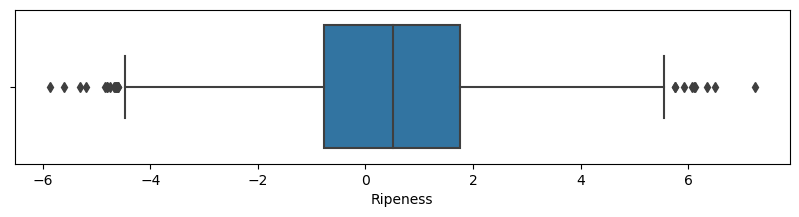

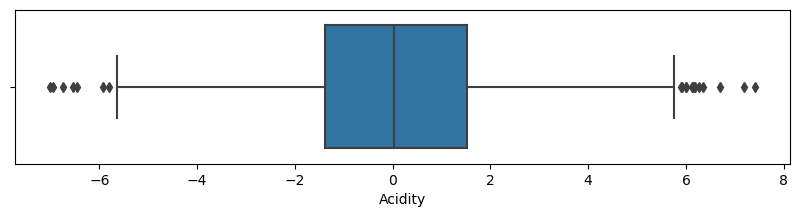

In [21]:
# Boxplot
for column in apple_quality_cleaned.columns:
    if column == 'Quality':
        break
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=column, data=apple_quality_cleaned)
    plt.show()

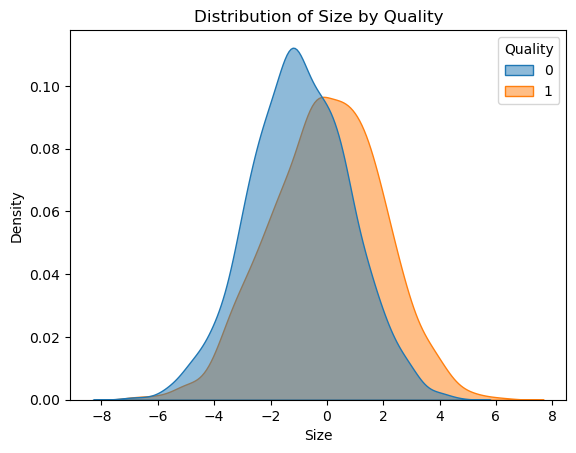

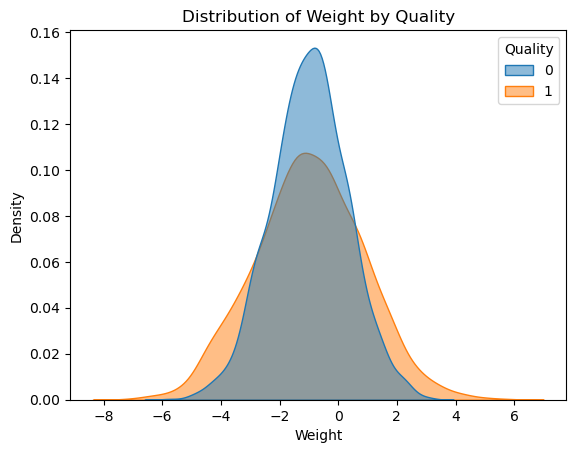

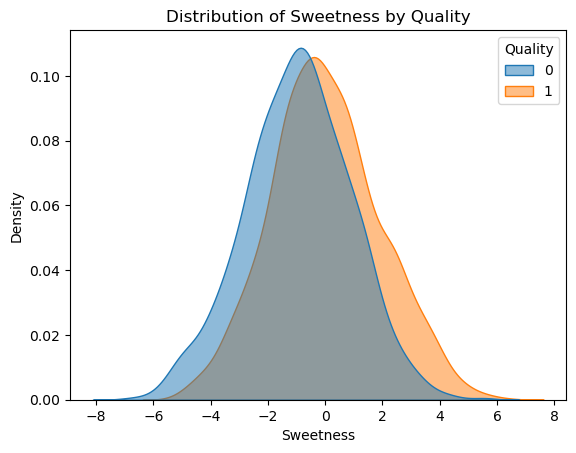

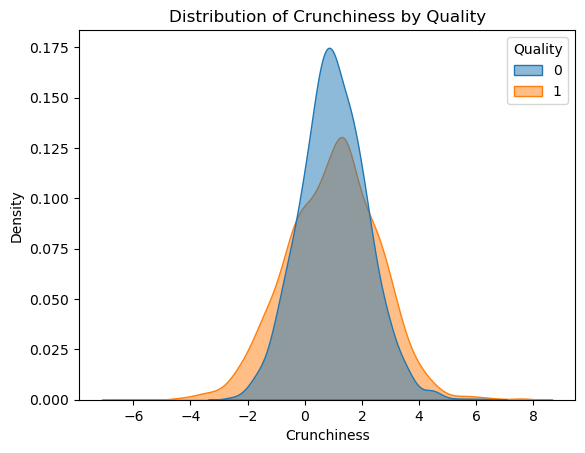

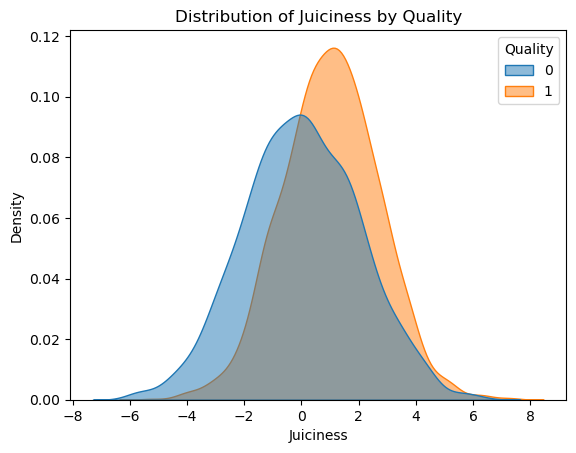

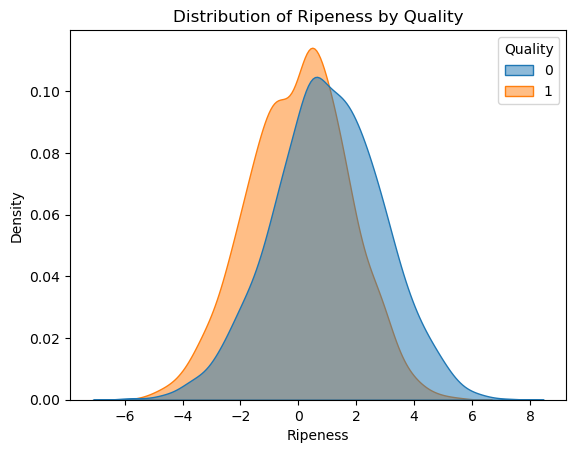

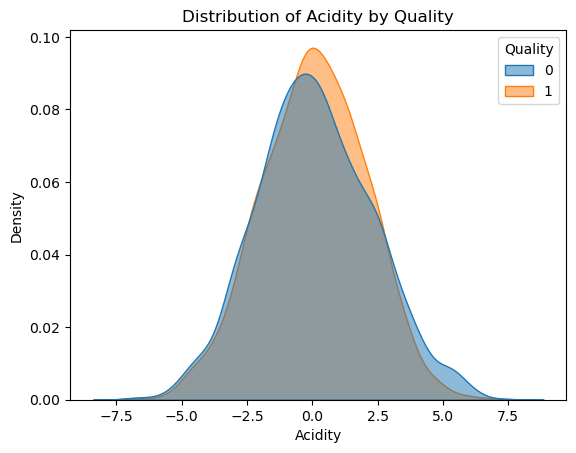

In [22]:
for column in apple_quality_cleaned.columns:
    if column == 'Quality':
        break
    sns.kdeplot(data=apple_quality_cleaned, x=column, hue='Quality', fill=True, alpha=0.5)
    plt.title(f'Distribution of {column} by Quality')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

# Outlier removal With IQR Method

In [23]:
apple_quality_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


In [24]:
# Remove outliers
Q1 = apple_quality_cleaned.quantile(0.25)
Q3 = apple_quality_cleaned.quantile(0.75)

In [25]:
df_no_outliers = pd.DataFrame()

for i in apple_quality_cleaned.columns:
    # Calculate the bounds for the current column
    lower_bound = Q1[i] - 1.5 * (Q3[i] - Q1[i])
    upper_bound = Q3[i] + 1.5 * (Q3[i] - Q1[i])
    
    # Filter out rows within the IQR range for the current column
    filtered_data = apple_quality_cleaned[(apple_quality_cleaned[i] >= lower_bound) & (apple_quality_cleaned[i] <= upper_bound)]
    
    # Assign filtered data to the new DataFrame
    df_no_outliers[i] = filtered_data[i]

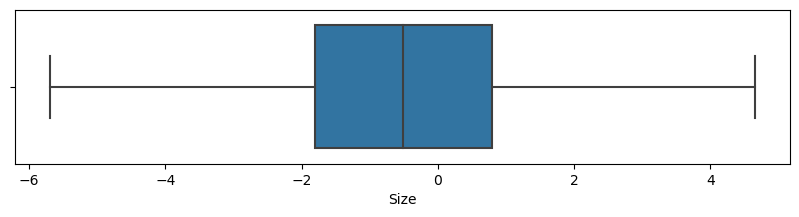

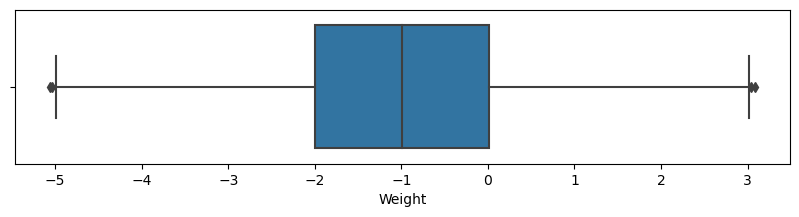

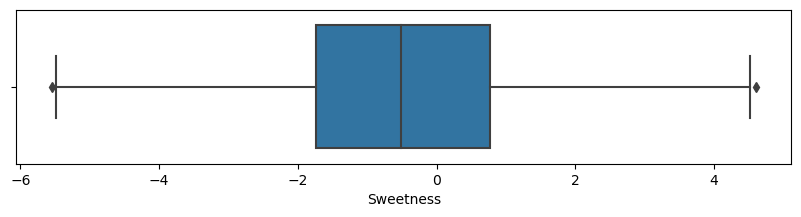

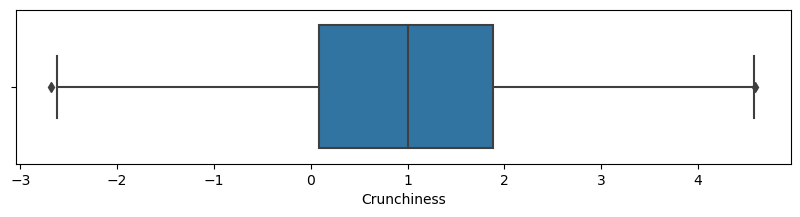

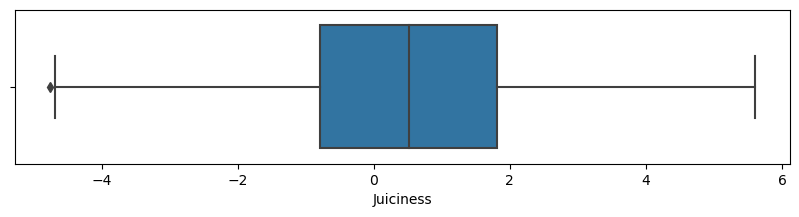

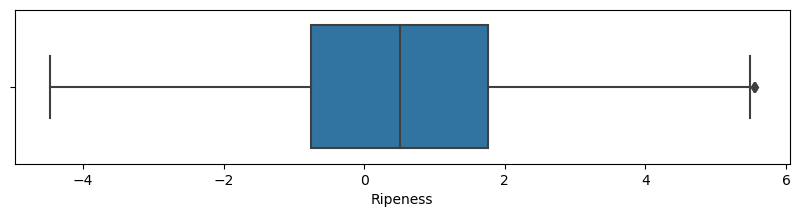

In [26]:
for column in df_no_outliers.iloc[:,:6].columns:
    plt.figure(figsize=(10, 2))
    sns.boxplot(data=df_no_outliers, x=column)
    plt.show()

In [27]:
#Fill NaN
df_no_outliers.fillna(df_no_outliers.mean(), inplace=True)

In [28]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3978 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3978 non-null   float64
 1   Weight       3978 non-null   float64
 2   Sweetness    3978 non-null   float64
 3   Crunchiness  3978 non-null   float64
 4   Juiciness    3978 non-null   float64
 5   Ripeness     3978 non-null   float64
 6   Acidity      3978 non-null   float64
 7   Quality      3978 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 279.7 KB


## Model preparation

In [29]:
#split data
X = df_no_outliers.drop("Quality", axis=1)
y = df_no_outliers["Quality"]
display(X.tail())
display(y.tail())

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity  
3995  0.137784  
3996  1.854235  
3997 -1.334611  
3998 -2.229720  
3999  1.599796

3995    0
3996    1
3997    0
3998    1
3999    1
Name: Quality, dtype: int64

In [30]:
#Scale the features
#sc = StandardScaler()
#sc.fit_transform(X)

In [31]:
#Split data in trainset and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
#Function that automates the search for the best hyperparameters
def grisearch_optim(param_grid, model, X, y, cv):
    # Create GridSearchCV instance
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1', verbose=True)

    # Fit the grid search to the training data
    grid_search.fit(X, y)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Score:", best_score)
    
    return best_params

## Random Forest

In [ ]:
RF_model = RandomForestClassifier(n_estimators=250, random_state=42)
RF_model.fit(X_train, y_train)

RF_predictions = RF_model.predict(X_test)

print(classification_report(RF_predictions, y_test))

In [ ]:
#optimize RF with hyperparameter tuning

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'criterion': ['gini', 'entropy']
}
# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=5, scoring='f1', verbose=True)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
#Plot the feature importance 
plt.bar(X_train.columns, RF_model.feature_importances_)
plt.title("Feature importance - Random Forest")
plt.xticks(rotation=45)

A quick analysis of the feature importance calculated from the Random Forest model suggests that all 7 features have a somewhat critical contribution to the model, therefore feature extraction or feature selection might be counterproductive in this case. We should validate this finding with a feature reduction method like PCA

In [ ]:
#optimize RF with hyperparameter tuning

# Define the parameter grid
RF_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
}
#initialize RF model
RF_model = RandomForestClassifier(random_state=42)

##Find best hyperparameter values 
grid_search_RF_params = grisearch_optim(RF_param_grid, RF_model, X_train, y_train, cv=5)

In [ ]:
# Retrain RF model with best parameters
RF_model = RandomForestClassifier(**grid_search_RF_params)
RF_model.fit(X_train, y_train)

RF_predictions = RF_model.predict(X_test)

print(classification_report(RF_predictions, y_test))

In [ ]:
RF_model = RandomForestClassifier(n_estimators=250, random_state=42)
RF_model.fit(X_train, y_train)

RF_predictions = RF_model.predict(X_test)

In [ ]:
#optimize RF with hyperparameter tuning

# Define the parameter grid
RF_param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'criterion': ['gini', 'entropy']
}
#initialize RF model
RF_model = RandomForestClassifier(random_state=42)

##Find best hyperparameter values 
grid_search_RF_params = grisearch_optim(RF_param_grid, RF_model, X_train, y_train, cv=5)

In [ ]:
# Retrain RF model with best parameters
RF_model = RandomForestClassifier(**grid_search_RF_params)
RF_model.fit(X_train, y_train)

RF_predictions = RF_model.predict(X_test)

print(classification_report(RF_predictions, y_test))

## PCA

We can attempt a dimensionality reduction with PCA so to extract the top 2 or 3 features that capture most of the covariance. If the feature importance calculated by the Random forest is correct, a dimensionality reduction will probably result in a lower accuracy

In [ ]:
from sklearn.decomposition import PCA
pc_ = 3
pca = PCA(n_components=pc_)
X_train_pca = pca.fit_transform(X_train)
print(f"The % of covariance captured by the top {pc_} principle components is: {sum(pca.explained_variance_ratio_)*100:.2f}%")

X_test_pca = pca.transform(X_test)

We can now re-train the Random Forest on the transformed dataset and see if the accuracy of the model has improved

In [ ]:
# Retrain RF model with best parameters
RF_model = RandomForestClassifier(**grid_search_RF_params)
RF_model.fit(X_train_pca, y_train)

RF_predictions = RF_model.predict(X_test_pca)

print(classification_report(RF_predictions, y_test))

Reducing the number of features has resulted in a lower F1 score, meaning that model accuracy has dropped. A different approach might be add engineered features as quadratic or cubic features, to see if these new features are able to increase the model accuracy

# Feature engineering

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#initialize class for quadratic features
poly_quad = PolynomialFeatures(degree=2)

#generate quadratic features for trainset and testset
X_train_quad = poly_quad.fit_transform(X_train)
X_test_quad = poly_quad.transform(X_test)

In [ ]:
#retest Random Forest with quadratic features
RF_model = RandomForestClassifier(**grid_search_RF_params)
RF_model.fit(X_train_quad, y_train)

RF_predictions = RF_model.predict(X_test_quad)

print(classification_report(RF_predictions, y_test))

In [ ]:
#initialize class for cubic features
poly_cube = PolynomialFeatures(degree=3)

#generate quadratic features for trainset and testset
X_train_cube = poly_cube.fit_transform(X_train)
X_test_cube = poly_cube.transform(X_test)

In [ ]:
#retest Random Forest with quadratic features
RF_model = RandomForestClassifier(**grid_search_RF_params)
RF_model.fit(X_train_cube, y_train)

RF_predictions = RF_model.predict(X_test_cube)

print(classification_report(RF_predictions, y_test))

Adding cubic features does not provide any benefit; we can stick with the quadratic features

In [ ]:
# #Reoptimize the Random Forest model with the quadratic features

# # Define the parameter grid
# RF_param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],       # Maximum depth of the trees
#     'criterion': ['gini', 'entropy'],
#     'bootstrap': [True, False],
#     #'min_samples_split': [2, 5, 10],
#     #'min_samples_leaf': [1, 2, 4],
# }
# #initialize RF model
# RF_model = RandomForestClassifier(random_state=42)

# ##Find best hyperparameter values 
# grid_search_RF_params = grisearch_optim(RF_param_grid, RF_model, X_train_quad, y_train, cv=5)

In [ ]:
# #rerun optimize Random Forest with quadratic features
# RF_model = RandomForestClassifier(**grid_search_RF_params)
# RF_model.fit(X_train_quad, y_train)

# RF_predictions = RF_model.predict(X_test_quad)

# test_report_perc = classification_report(RF_predictions, y_test)
# print(test_report_perc)

# Perceptron

In [46]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
# X_combined_std = sc.transform(X)
X_combined_std = np.concatenate((X_train_std,X_test_std))
y_combined = np.concatenate((y_train,y_test))

ppn = Perceptron(max_iter=10000, tol=1e-6, eta0=0.1, random_state=2)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_train_std)
print('Misclassified train examples: %d' % (y_train != y_pred).sum(),
      'out of %d' % len(y_pred))

print('Train accuracy: %.3f' % accuracy_score(y_train, y_pred))
# print('Train accuracy: %.3f' % ppn.score(X_train_std, y_train))
print()

y_pred = ppn.predict(X_test_std)
print('Misclassified test examples:  %d' % (y_test != y_pred).sum(),
      'out of %d' % len(y_pred))

print('Test accuracy:  %.3f' % accuracy_score(y_test, y_pred))
# print('Test accuracy: %.3f' % ppn.score(X_test_std, y_test))

Misclassified train examples: 809 out of 2784
Train accuracy: 0.709

Misclassified test examples:  346 out of 1194
Test accuracy:  0.710


In [47]:
# Init Perceptron classifier
clf = Perceptron(random_state=42)

# Train classifier on training data
clf.fit(X_train_std, y_train)

# Evaluate the classifier's accuracy on the test data
baseline_accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Baseline Accuracy:", baseline_accuracy)

# Had to convert to numpy array because it didn't like using a dataframe. 
X_test_np = X_test.to_numpy()

# Calculate permutation-based feature importance
feature_importance = {}
for i in range(X_test_np.shape[1]):  # Use shape[1] to get the number of columns
    X_test_shuffled = X_test_np.copy()
    np.random.shuffle(X_test_shuffled[:, i])  # Shuffle values of feature i
    shuffled_accuracy = accuracy_score(y_test, clf.predict(X_test_shuffled))
    feature_importance[i] = baseline_accuracy - shuffled_accuracy

# Print out results. 
sorted_indices = sorted(feature_importance, key=feature_importance.get, reverse=True)
print("Feature Importance Ranking:")
for i in sorted_indices:
    print(f"Feature {i}: {feature_importance[i]}")

Baseline Accuracy: 0.6909547738693468
Feature Importance Ranking:
Feature 4: 0.06616415410385268
Feature 5: 0.05443886097152428
Feature 0: 0.04941373534338367
Feature 2: 0.04020100502512569
Feature 6: 0.021775544388609736
Feature 3: 0.005025125628140725
Feature 1: 0.0


C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


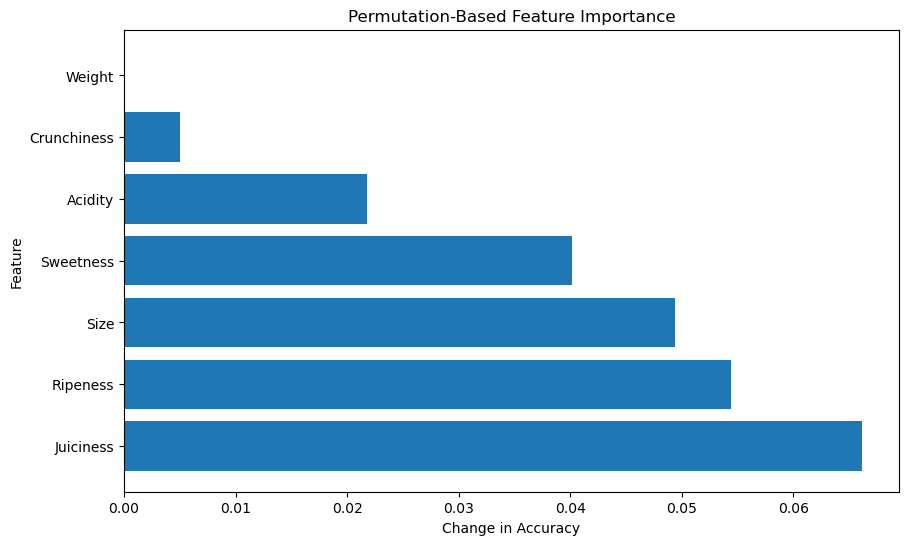

In [48]:
# Extract feature names (assuming X_test is a DataFrame)
feature_names = X_test.columns

# Extract feature importance values and sort them
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Extract feature indices and importance values
feature_indices, importance_values = zip(*sorted_feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_values)), importance_values, align='center')
plt.yticks(range(len(importance_values)), [feature_names[i] for i in feature_indices])
plt.xlabel('Change in Accuracy')
plt.ylabel('Feature')
plt.title('Permutation-Based Feature Importance')
plt.show()

In [49]:
print("Dimensions of X_combined_std:", X_combined_std.shape)
print("Expected number of features for Perceptron classifier:", ppn.coef_.shape[1])


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    if X.shape[1] > 2:
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
    else:
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

Dimensions of X_combined_std: (3978, 7)
Expected number of features for Perceptron classifier: 7


In [50]:
# from sklearn.metrics import precision_recall_curve, auc

# # percision recall curve
# precision, recall, thresholds = precision_recall_curve(y_test, ppn.decision_function(X_test_quad)) #y_test_pred makes it 1.00

# # Area under the curve
# pr_auc = auc(recall, precision)

# # Plotting
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='blue', label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.grid(True)
# plt.show()

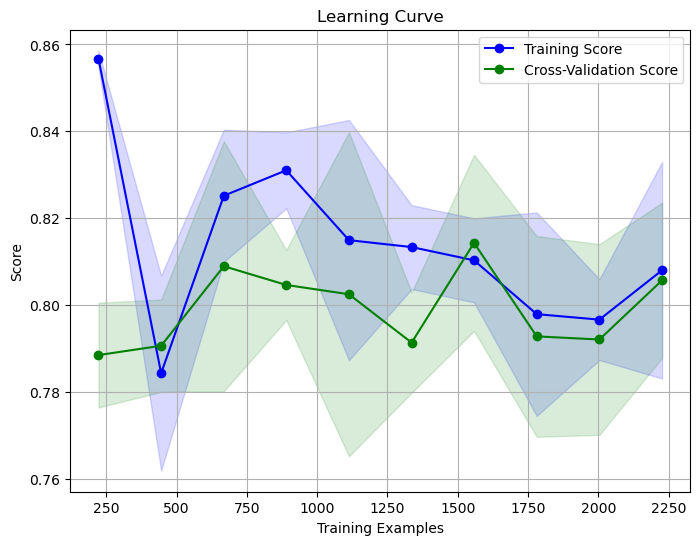

In [51]:
from sklearn.model_selection import learning_curve

# train_sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# creating learning curve 
train_sizes_abs, train_scores, test_scores = learning_curve(ppn, X_train_quad, y_train, train_sizes=train_sizes, cv=5)

# mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(train_sizes_abs, train_mean, marker='o', color='blue', label='Training Score')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes_abs, test_mean, marker='o', color='green', label='Cross-Validation Score')
plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7437185929648241


In [53]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Calculate baseline accuracy
y_pred_baseline = model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# Calculate permutation-based feature importance
feature_importance = {}
for feature in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[feature] = np.random.permutation(X_test_shuffled[feature])
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_accuracy = accuracy_score(y_test, y_pred_shuffled)
    feature_importance[feature] = baseline_accuracy - shuffled_accuracy

# Rank features based on importance
sorted_features = sorted(feature_importance, key=feature_importance.get, reverse=True)

# Print feature importance
for i, feature in enumerate(sorted_features, 1):
    print(f"Rank {i}: {feature} - Importance: {feature_importance[feature]}")

# Optionally, select the top features and retrain the model

Rank 1: Size - Importance: 0.13735343383584586
Rank 2: Sweetness - Importance: 0.08877721943048578
Rank 3: Juiciness - Importance: 0.06867671691792299
Rank 4: Acidity - Importance: 0.047738693467336724
Rank 5: Ripeness - Importance: 0.025125628140703515
Rank 6: Weight - Importance: 0.024288107202680043
Rank 7: Crunchiness - Importance: 0.002512562814070307


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the features ranked by permutation-based feature importance
features = ['Size', 'Sweetness', 'Juiciness', 'Acidity', 'Weight', 'Ripeness', 'Crunchiness']
feature_importance = [0.09924623115577891, 0.0879396984924623, 0.041457286432160845,
                      0.027638190954773934, 0.01005025125628145, 0.006281407035175879, 0.0]

# Initialize an empty list to store model accuracies
accuracies = []

# Loop through different subsets of features
for i in range(1, len(features) + 1):
    selected_features = features[:i]  # Select top i features
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    # Initialize and train logistic regression model
    model = LogisticRegression()
    model.fit(X_train_subset, y_train)
    
    # Make predictions and calculate accuracy
    y_pred = model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Model with top {i} features - Accuracy: {accuracy}")

# Find the index of the model with the highest accuracy
best_model_index = np.argmax(accuracies)
best_subset_size = best_model_index + 1
best_accuracy = accuracies[best_model_index]
best_features = features[:best_subset_size]

print(f"\nBest model: Top {best_subset_size} features - Accuracy: {best_accuracy}")
print(f"Selected features: {best_features}")

Model with top 1 features - Accuracy: 0.6222780569514238
Model with top 2 features - Accuracy: 0.6926298157453936
Model with top 3 features - Accuracy: 0.7127303182579564
Model with top 4 features - Accuracy: 0.7194304857621441
Model with top 5 features - Accuracy: 0.7345058626465661
Model with top 6 features - Accuracy: 0.7412060301507538
Model with top 7 features - Accuracy: 0.7437185929648241

Best model: Top 7 features - Accuracy: 0.7437185929648241
Selected features: ['Size', 'Sweetness', 'Juiciness', 'Acidity', 'Weight', 'Ripeness', 'Crunchiness']


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a pipeline with feature scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
])

# Define hyperparameters grid for grid search
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'log_reg__penalty': ['l1', 'l2'],               # Using L1 and L2 as penalties
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Improved Accuracy:", accuracy)

Improved Accuracy: 0.7437185929648241


C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Init lr model 
lr_model = LogisticRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Calc baseline accuracy
y_pred_baseline = lr_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

# # Calc permutation-based feature importance
# feature_importance = {}
# for feature in X_test.columns:
#     X_test_shuffled = X_test.copy()
#     X_test_shuffled[feature] = np.random.permutation(X_test_shuffled[feature])
#     y_pred_shuffled = lr_model.predict(X_test_shuffled)
#     shuffled_accuracy = accuracy_score(y_test, y_pred_shuffled)
#     feature_importance[feature] = baseline_accuracy - shuffled_accuracy

# # Rank features based on importance
# sorted_features = sorted(feature_importance, key=feature_importance.get, reverse=True)

# feature_ls = []
# feature_importance_ls = []
# # Print feature importance
# for i, feature in enumerate(sorted_features, 1):
#     print(f"Rank {i}: {feature} - Importance: {feature_importance[feature]}")
#     feature_ls.append(feature)
#     feature_importance_ls.append(feature_importance[feature])

# size and sweetness have the most importance from the rest. 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# using feature_ls and feature_importance_ls

# sorted_indices = np.argsort(feature_importance_ls)[::-1]
# sorted_features = [feature_ls[i] for i in sorted_indices]

# store accuracies
accuracies = []

# Loop through different subsets of features
# for i in range(1, len(feature_ls) + 1):
#     selected_features = sorted_features[:i]  # Select top i features
#     X_train_subset = X_train[selected_features]
#     X_test_subset = X_test[selected_features]
    
    # init logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_quad, y_train)

# predictions and find accuracy
y_pred = lr_model.predict(X_test_quad)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)

print(f"lr_model Accuracy: {accuracy}")

# best accuracy
# best_model_index = np.argmax(accuracies)
# best_subset_size = best_model_index + 1
# best_accuracy = accuracies[best_model_index]
# best_features = sorted_features[:best_subset_size]

# print(f"\nBest model: Top {best_subset_size} features - Accuracy: {best_accuracy}")
# print(f"Selected features: {best_features}")

lr_model Accuracy: 0.8408710217755444


C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Using L1 and L2 as penalties
    'solver': ['liblinear', 'saga'],       # Solvers for logistic regression
    'max_iter': [100, 200, 300],           # Maximum number of iterations
}
grid_search_lr_params = grisearch_optim(lr_param_grid, lr_model, X_train_quad, y_train, cv=5)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8625212498621186


C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [59]:
#rerun optimize Random Forest with quadratic features
lr_model = LogisticRegression(**grid_search_lr_params)
lr_model.fit(X_train_quad, y_train)

lr_predictions = lr_model.predict(X_test_quad)

test_report_lr = classification_report(lr_predictions, y_test)
print(test_report_lr)

C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.86      0.84      0.85       622
           1       0.83      0.85      0.84       572

    accuracy                           0.84      1194
   macro avg       0.84      0.84      0.84      1194
weighted avg       0.84      0.84      0.84      1194



# SVM

In [60]:
SVM_param_grid = {
    'C': [0.1, 1, 5, 10],     # Regularization parameter
    'gamma': [0.1, 1, 5, 10], # Kernel coefficient
    'kernel': ['rbf', 'linear', 'poly']
}

SVM_model = SVC()

grid_search_SVM_params = grisearch_optim(SVM_param_grid, SVM_model, X_train_quad, y_train, cv=5)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best Score: 0.8602902031284689


In [61]:
#Retrain SVM model with best parameters
SVM_model = SVC(**grid_search_SVM_params)
SVM_model.fit(X_train_quad, y_train)

y_pred_SVM = SVM_model.predict(X_test_quad)

# Evaluate model performance
test_report_SVM = classification_report(y_test, y_pred_SVM)

print("Test Classification Report:")
print(test_report_SVM)

Test Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       606
           1       0.84      0.85      0.84       588

    accuracy                           0.85      1194
   macro avg       0.85      0.85      0.85      1194
weighted avg       0.85      0.85      0.85      1194



# AdaBoost
bruno

In [62]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=5,
                              random_state=1)

ada_model = AdaBoostClassifier(random_state=1)

In [63]:
Ada_param_grid = {
    'base_estimator__max_depth': [3, 5, 7],# Max depth of the base decision tree
    'base_estimator__criterion': ["entropy", "gini"],
    'n_estimators': [150, 200, 300],         # Number of estimators (weak learners)
    'learning_rate': [0.01, 0.1, 1.0]        # Learning rate
}

ada_model_CV = AdaBoostClassifier(estimator=tree,random_state=1)

ada_best_params = grisearch_optim(Ada_param_grid, ada_model_CV, X_train, y_train, cv=5)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\aberg\anaconda3\Lib\site-p

Best Parameters: {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 7, 'learning_rate': 1.0, 'n_estimators': 200}
Best Score: 0.8779028981820852


In [64]:
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=7,
                              random_state=1)

ada_model = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=200,
                         learning_rate=1,
                         random_state=1)

ada_model.fit(X_train_quad, y_train)

#Predict labels
y_pred_ada = ada_model.predict(X_test_quad)
# Evaluate model performance
test_report_SVM = classification_report(y_test, y_pred_ada)

print("Test Classification Report:")
print(test_report_SVM)

C:\Users\aberg\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       606
           1       0.88      0.86      0.87       588

    accuracy                           0.87      1194
   macro avg       0.87      0.87      0.87      1194
weighted avg       0.87      0.87      0.87      1194



## K-NN

In [65]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting method
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

Accuracy: 0.8793969849246231

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       606
           1       0.89      0.86      0.88       588

    accuracy                           0.88      1194
   macro avg       0.88      0.88      0.88      1194
weighted avg       0.88      0.88      0.88      1194


Confusion Matrix:
[[543  63]
 [ 81 507]]


## Adaboost

In [66]:
# Instantiate a Decision Tree classifier as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Stump

# Instantiate AdaBoost classifier
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners
    'learning_rate': [0.1, 0.5, 1.0]  # Learning rate
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_adaboost = grid_search.best_estimator_

y_pred = best_adaboost.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}

Accuracy: 0.7562814070351759

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       606
           1       0.75      0.75      0.75       588

    accuracy                           0.76      1194
   macro avg       0.76      0.76      0.76      1194
weighted avg       0.76      0.76      0.76      1194


Confusion Matrix:
[[461 145]
 [146 442]]


## XGboost

In [67]:
# Instantiate XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of a tree
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_xgb = grid_search.best_estimator_

# Predict on the testing data using the best model
y_pred = best_xgb.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}

Accuracy: 0.8592964824120602

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       606
           1       0.87      0.84      0.86       588

    accuracy                           0.86      1194
   macro avg       0.86      0.86      0.86      1194
weighted avg       0.86      0.86      0.86      1194


Confusion Matrix:
[[530  76]
 [ 92 496]]


In [68]:
# Instantiate SVM classifier
svm = SVC(kernel='rbf', random_state=42)  # Using radial basis function (RBF) kernel

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_svm = grid_search.best_estimator_

# Predict on the testing data using the best model
y_pred = best_svm.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'C': 1, 'gamma': 'auto'}

Accuracy: 0.8944723618090452

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       606
           1       0.89      0.89      0.89       588

    accuracy                           0.89      1194
   macro avg       0.89      0.89      0.89      1194
weighted avg       0.89      0.89      0.89      1194


Confusion Matrix:
[[544  62]
 [ 64 524]]


## Neural Network

In [ ]:
#pip install keras-tuner

In [33]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from kerastuner.tuners import RandomSearch

# Define the function to build the model
def create_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', 128, 512, step=64), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)))
    model.add(Dense(units=hp.Int('units2', 64, 256, step=64), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)))
    model.add(Dense(units=hp.Int('units3', 32, 128, step=32), activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(hp.Float('dropout_rate', 0.3, 0.7, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1]))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform random search
tuner = RandomSearch(
    create_model,
    objective='val_accuracy',
    max_trials=10, # 3 seems to be better
    executions_per_trial=3,
    directory='my_dir',
    project_name='my_project')

tuner.search(X_train, y_train, epochs=100, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
best_model.fit(X_train, y_train, epochs=100, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)



# 300: was around 94
# 150: 0.9512500166893005
# 50: 0.9512500166893005
# 200: Test Accuracy: 0.9524999856948853
# 100: 0.9537500143051147

Reloading Tuner from my_dir\my_project\tuner0.json

Epoch 1/100


80/80 [==============================] - 1s 4ms/step - loss: 0.5314 - accuracy: 0.7505 - val_loss: 0.4666 - val_accuracy: 0.7755
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8141 - val_loss: 0.3717 - val_accuracy: 0.8352
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8405 - val_loss: 0.3284 - val_accuracy: 0.8540
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3626 - accuracy: 0.8342 - val_loss: 0.2937 - val_accuracy: 0.8713
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8456 - val_loss: 0.2692 - val_accuracy: 0.8744
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3318 - accuracy: 0.8668 - val_loss: 0.2750 - val_accuracy: 0.8854
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8609 -

In [34]:
from sklearn.metrics import roc_auc_score

#Assuming y_true contains the true labels and y_score contains the predicted probabilities
#y_true should be a binary vector of true labels (0 or 1)
#y_score should be a vector of predicted probabilities for the positive class
#Calculate ROC AUC
y_pred = best_model.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred)

print("ROC AUC:", roc_auc)

25/25 [==============================] - 0s 772us/step
ROC AUC: 0.9796068158665678
